In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

California housing dataset
--------------------------

**Dataset characteristics:**

    :Number of instances: 20640

    :Number of attributes: eight numeric, predictive attributes and the target

    :Attribute information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing attribute values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

It can be downloaded/loaded by using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [45]:
# Load dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [78]:
y1 = np.reshape(y, (-1, 1))
y1

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [79]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [83]:
med_inc = np.array([row[0] for row in X]).reshape(-1, 1)
med_inc

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

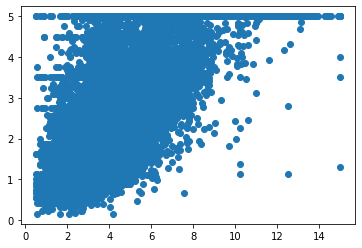

In [89]:
# Plot the data.
plt.scatter(med_inc, y)
# YOUR CODE HERE

In [90]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression
# YOUR CODE HERE
model = LinearRegression()
model


LinearRegression()

In [91]:
# Fit the model to the data. 
# Note: This is the training step, where you fit the line to the data.
model.fit(med_inc, y)

score = model.score(med_inc, y)
print(f"R2 Score: {score}")
# YOUR CODE HERE

R2 Score: 0.47344749180719903


In [92]:
# Print the coefficient and the intercept for the model.

# YOUR CODE HERE
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [0.41793849]
y-axis intercept:  0.45085576703267916


In [93]:
# Note: We have to transform our min and max values 
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.

x_min = np.array([[med_inc.min()]])
x_max = np.array([[med_inc.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.4999]]
Max X Value: [[15.0001]]


In [100]:
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

# YOUR CODE HERE
predictions = model.predict(med_inc)
print(predictions)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

[3.9302773  3.92033036 3.48400258 ... 1.1613512  1.23123052 1.44914365]
True output: 4.526
Predicted output: 3.9302773007889478
Prediction Error: -0.595722699211052


In [95]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,3.930277,4.526,-0.595723
1,3.920330,3.585,0.335330
2,3.484003,3.521,-0.036997
3,2.809324,3.413,-0.603676
4,2.058331,3.422,-1.363669
...,...,...,...
20635,1.102965,0.781,0.321965
20636,1.519441,0.771,0.748441
20637,1.161351,0.923,0.238351
20638,1.231231,0.847,0.384231


In [96]:
x_min = med_inc.min()
x_max = med_inc.max()
print(x_min)
print(x_max)

0.4999
15.0001


In [97]:
y_min_actual = y.min()
y_max_actual = y.max()
print(y_min_actual)
print(y_max_actual)

0.14999
5.00001


In [98]:
y_min = model.intercept_ + (model.coef_ * x_min)
y_max = model.intercept_ + (model.coef_ * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.14999
Calculated Min Value: [0.65978322]
Actual Max Value: 5.00001
Calculated Max Value: [6.71997494]


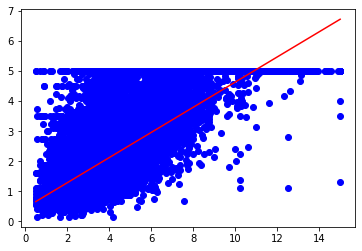

In [99]:
# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

plt.scatter(med_inc, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

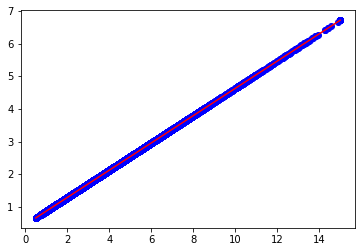

In [101]:
plt.scatter(med_inc, predictions, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

## Multiple Linear Regression

In [29]:
# Use train_test_split to create the training and testing data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# YOUR CODE HERE

In [30]:
# Create the model by using LinearRegression.
from sklearn.linear_model import LinearRegression
# YOUR CODE HERE
model = LinearRegression()
model


LinearRegression()

In [31]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

# YOUR CODE HERE
# YOUR CODE HERE

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.609873031052925
Testing Score: 0.5910509795491355


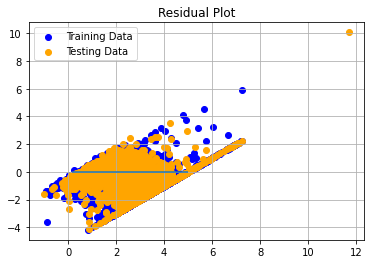

In [34]:
# Plot the residuals for the training and testing data.
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='blue', label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='orange', label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.grid()
plt.show()
# YOUR CODE HERE